In [12]:
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1)
y = 4 + 3 * X + np.random.randn(m, 1)




In [13]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

theta_best

array([[4.21509616],
       [2.77011339]])

In [14]:
X_new = np.array(([[0], [2]]))
X_new_b = add_dummy_feature(X_new)
y_predict = X_new_b @ theta_best
y_predict

array([[4.21509616],
       [9.75532293]])

(0.0, 2.0)

(0.0, 15.0)

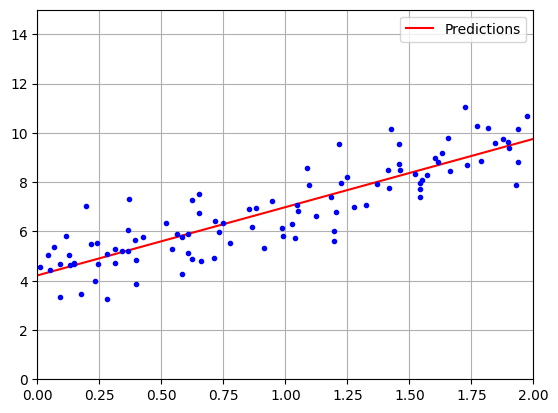

In [21]:
import matplotlib.pyplot as plt

plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")
plt.grid(axis="both")
plt.xlim(left=0, right=2)
plt.ylim(bottom=0, top=15)
plt.legend()
plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_
lin_reg.predict(X_new)



LinearRegression()

(array([4.21509616]), array([[2.77011339]]))

array([[4.21509616],
       [9.75532293]])

In [ ]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

In [26]:
np.linalg.pinv(X_b) @ y

array([[4.21509616],
       [2.77011339]])

In [29]:
eta = 0.1
n_epochs = 1000
m = len(X_b)

np.random.seed(42)
theta = np.random.randn(2, 1)

# Regner ut gradient descent (stigningstallet til kurven?)

for epoch in range(n_epochs):
    gradients = 2 / m * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients

theta

array([[4.21509616],
       [2.77011339]])

In [ ]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

np.random.seed(42)
theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for iteration in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index + 1]
        yi = y[random_index : random_index + 1]
        gradients = 2 * xi.T @ (xi @ theta - yi)
        eta = learning_schedule(epoch * m * iteration)
        theta = theta - eta * gradients

# Min theta blir annerledes enn bokens: I boken er den [[4.21076011], [2.74856079]], min er [[4.49818027], [3.067635]].
# Jeg vet ikke hva dette kommer av. 
theta

array([[4.49818027],
       [3.067635  ]])

In [ ]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=0.01, n_iter_no_change=100, random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

# den innebygde modellen fungerer bedre, tror jeg, enn den enkle implementasjonen av SGD i cellen over: 

SGDRegressor(n_iter_no_change=100, penalty=None, random_state=42, tol=1e-05)

(array([4.21278812]), array([2.77270267]))

<Figure size 600x400 with 0 Axes>

Text(0.5, 0, '$x_1$')

Text(0, 0.5, '$y$')

(np.float64(-3.0), np.float64(3.0), np.float64(0.0), np.float64(10.0))

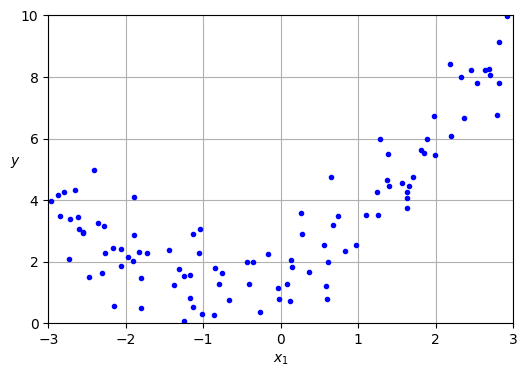

In [37]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

# Kode fra github

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([-3, 3, 0, 10])
plt.grid()
plt.show()

In [38]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]
X_poly[0]

array([-0.75275929])

array([-0.75275929,  0.56664654])

LinearRegression()

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

<Figure size 600x400 with 0 Axes>

Text(0.5, 0, '$x_1$')

Text(0, 0.5, '$y$')

(np.float64(-3.0), np.float64(3.0), np.float64(0.0), np.float64(10.0))

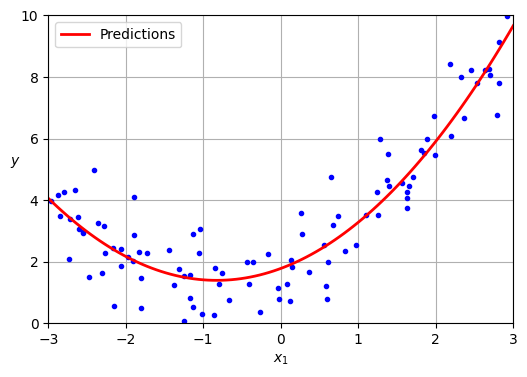

In [40]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper left")
plt.axis([-3, 3, 0, 10])
plt.grid()
plt.show()

Text(0.5, 0, 'Training set size')

Text(0, 0.5, 'RMSE')

(0.0, 83.95)

(0.0, 3.263170525039349)

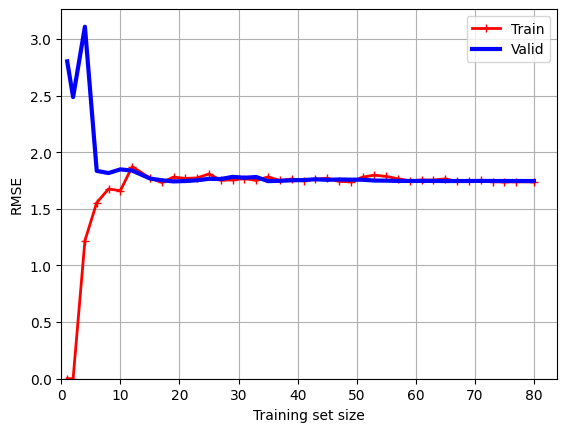

In [44]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(LinearRegression(), X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error")
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="Train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="Valid")
plt.grid(True)
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.legend()
plt.show()